# üì± **Google Play Store Apps Analysis**

**Author:** Dhaara Thakkar   

## üìå Project Objective

To clean, transform, and analyze the Google Play Store dataset and uncover insights about app ratings, categories, installs, and pricing.

## üßæ Step 1: Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## üìÇ Step 2: Load the Dataset

In [7]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Google Play Store Apps\googleplaystore.csv") #Update path as needed

In [8]:
df.shape

(10841, 13)

In [9]:
df.head().style

## üßº Step 3: Data Cleaning

### üîπ 3.1: Initial Overview

In [12]:
print(df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


**Observation:**  
The maximum rating is 19.0 ‚Äî but ratings on the Play Store should only go up to 5.

‚úÖ **Action Taken:**  
Dropped the row using its index.

In [14]:
print(df[df['Rating'] == 19].index)

Index([10472], dtype='int64')


In [15]:
df = df.drop(df[df['Rating'] == 19].index)

### üîπ 3.2: Data Types & Structure

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB
None


In [18]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex = True).astype(int)

In [19]:
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [20]:
df['Reviews'] = df['Reviews'].astype(int)

### üîπ 3.3: Duplicate Values

In [22]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 483


In [23]:
df.drop_duplicates(inplace=True)

### üîπ 3.4: Missing Values

#### Handling Missing Values in Rating

In [26]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


We noticed several missing values in the `Rating` column.  
Instead of dropping them, we filled them using the **mean rating of similar apps grouped by binned `Installs`**.

To do that, we first created an `Installs_category` column:

In [28]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very high', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins = bins, labels  = labels)

Then, we filled the missing values in `Rating` using the **grouped mean** of these install categories:

In [30]:
df['Rating'] = df.groupby('Installs_category', observed = True)['Rating'].transform(lambda x: x.fillna(x.mean()))

In [31]:
print(df.isnull().sum())

App                   0
Category              0
Rating               15
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Installs_category     0
dtype: int64


After filling missing values in the `Rating` column using group-wise means from `Installs_category`,  
we found that **15 rows still had NaN values** in `Rating`.

We found that these remaining rows all fell under the 'no' install category ‚Äî i.e., apps with 0 installs.

In [34]:
df[df['Rating'].isna()]['Installs_category'].value_counts()

Installs_category
no                    15
Very low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very high              0
Top Notch              0
Name: count, dtype: int64

In [35]:
df[(df['Installs_category'] == 'no') & (df['Rating'].isna())]

App            Category  \
4465  Popsicle Launcher for Android P 9.0 launcher     PERSONALIZATION   
5307                       Ak Parti Yardƒ±m Toplama              SOCIAL   
5486                        AP Series Solution Pro              FAMILY   
5945                    Ain Arabic Kids Alif Ba ta              FAMILY   
6692                                 cronometra-br        PRODUCTIVITY   
7434                                 Pekalongan CJ              SOCIAL   
8081                                    CX Network            BUSINESS   
8614                             Sweden Newspapers  NEWS_AND_MAGAZINES   
8871                        Test Application DT 02      ART_AND_DESIGN   
9148                     Command & Conquer: Rivals              FAMILY   
9337                      EG | Explore Folegandros    TRAVEL_AND_LOCAL   
9719                                  EP Cook Book             MEDICAL   
9905                                   Eu sou Rico             FINANCE   
9917                                   Eu Sou Rico             FINANCE   
9934             I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢           LIFESTYLE   

      Rating  Reviews                Size  Installs  Type   Price  \
4465     NaN        0                5.5M         0  Paid    1.49   
5307     NaN        0                8.7M         0  Paid   13.99   
5486     NaN        0                7.4M         0  Paid    1.99   
5945     NaN        0                 33M         0  Paid    2.99   
6692     NaN        0                5.4M         0  Paid  154.99   
7434     NaN        0                5.9M         0  Free    0.00   
8081     NaN        0                 10M         0  Free    0.00   
8614     NaN        0                2.1M         0  Free    0.00   
8871     NaN        0                1.2M         0  Free    0.00   
9148     NaN        0  Varies with device         0   NaN    0.00   
9337     NaN        0                 56M         0  Paid    3.99   
9719     NaN        0                3.2M         0  Paid  200.00   
9905     NaN        0                2.6M         0  Paid   30.99   
9917     NaN        0                1.4M         0  Paid  394.99   
9934     NaN        0                 40M         0  Paid  399.99   

     Content Rating            Genres       Last Updated         Current Ver  \
4465       Everyone   Personalization      July 11, 2018                 1.1   
5307           Teen            Social      July 28, 2017           3.4.4.3.3   
5486       Everyone         Education      July 30, 2017                 1.3   
5945       Everyone         Education     April 15, 2016                 1.0   
6692       Everyone      Productivity  November 24, 2017               1.0.0   
7434           Teen            Social      July 21, 2018               0.0.1   
8081       Everyone          Business     August 6, 2018               1.3.1   
8614       Everyone  News & Magazines       July 7, 2018                 1.1   
8871       Everyone      Art & Design     March 14, 2017                 4.0   
9148   Everyone 10+          Strategy      June 28, 2018  Varies with device   
9337       Everyone    Travel & Local   January 22, 2017               1.1.1   
9719       Everyone           Medical      July 26, 2015                 1.0   
9905       Everyone           Finance    January 9, 2018                 1.0   
9917       Everyone           Finance      July 11, 2018                 1.0   
9934       Everyone         Lifestyle   December 1, 2017               MONEY   

             Android Ver Installs_category  
4465          4.2 and up                no  
5307          4.1 and up                no  
5486          4.0 and up                no  
5945          3.0 and up                no  
6692          4.1 and up                no  
7434          4.4 and up                no  
8081          4.1 and up                no  
8614          4.4 and up                no  
8871          4.2 and up                no  
9148  Varie

Since apps with 0 installs are not used or rated by anyone, they offer no analytical value,
so we decided to drop these rows from the dataset.

In [37]:
df = df[df['Installs'] > 0]

#### Handling Missing Values in Other Columns

In [39]:
df.dropna(subset=['Current Ver', 'Android Ver', 'Type'],inplace = True)

In [40]:
print(df.isnull().sum())

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Installs_category    0
dtype: int64


## üîÑ Step 4: Feature Engineering

### üîπ Create Size_MB Feauture from Raw 'Size' Column

The `Size` column originally contains inconsistent string values like `"19M"`, `"14k"`, and `"Varies with device"`.  
To analyze app sizes effectively, we converted these to numeric format in **bytes**, and then to **megabytes (MB)** for readability.

‚úÖ This makes the data usable for comparisons, distributions, and visualizations.

In [43]:
df['Size'].value_counts()

Size
Varies with device    1525
11M                    187
12M                    186
13M                    186
14M                    181
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: count, Length: 457, dtype: int64

In [44]:
def convert_size_to_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace("k", "")) * 1024
        elif 'M' in size:
            return float(size.replace("M", "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size_in_bytes'] = df['Size'].apply(convert_size_to_bytes)
df['Size_MB'] = df['Size_in_bytes'] / (1024 * 1024)

We earlier created `Installs_category` for imputation,  
but it also helps simplify analysis and visualize trends across install ranges.

In [46]:
df.to_csv('C:/Users/Admin/Documents/Projects/googleplaystore_cleaned.csv', index=False)

## üìä Step 5: Exploratory Data Analysis

### üîπ Distribution of Ratings

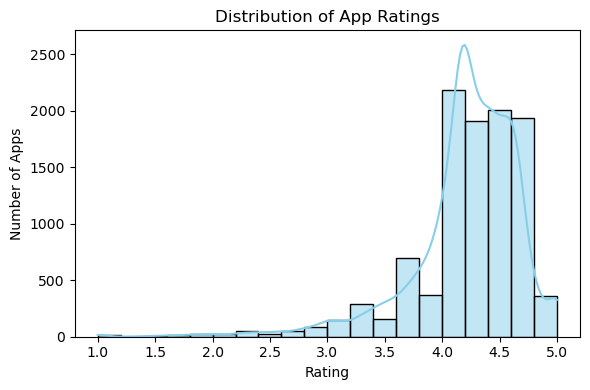

In [49]:
plt.figure(figsize=(6, 4))  
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")  

plt.tight_layout()
plt.show()

### üîπ Most Common Categories

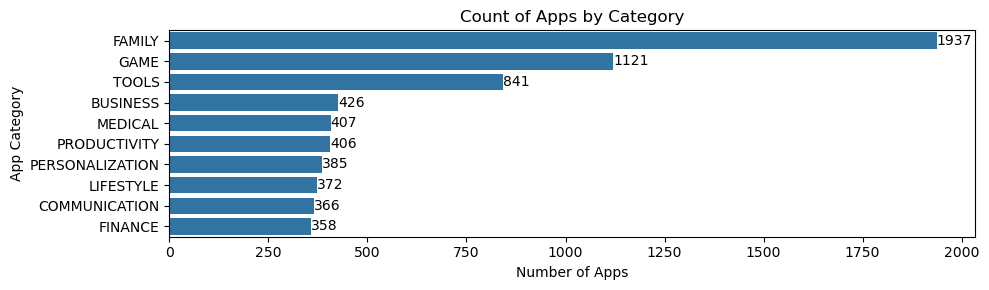

In [51]:
plt.figure(figsize=(10, 3))
ax = sns.countplot(y='Category', data=df, order=df['Category'].value_counts().head(10).index)

ax.bar_label(ax.containers[0], label_type='edge')  

plt.title("Count of Apps by Category")
plt.xlabel("Number of Apps")
plt.ylabel("App Category")
plt.tight_layout()
plt.show()

### üîπ Free vs Paid Apps

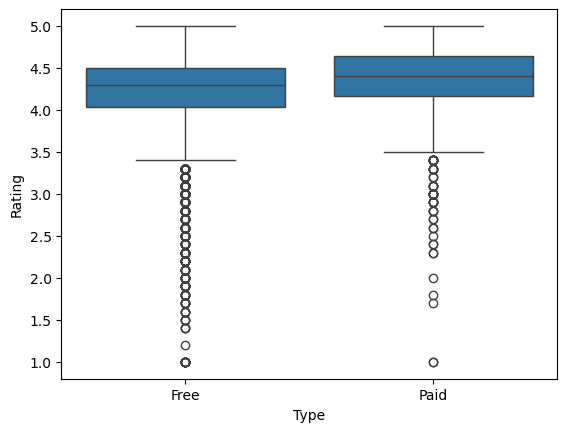

In [53]:
sns.boxplot(x='Type', y='Rating', data=df)
plt.show()

### üîπ Top Apps with 1B+ Installs ‚Äî Ranked by User Engagement

Google Play reports installs in ranges like 10K, 100K, 1M, 10M, etc.  
As a result, many apps have the **same install count**.

For example, over **1,400 apps have 1M installs**, and nearly **1,000 apps have 10M installs**.

In [56]:
df['Installs'].value_counts().head()

Installs
1000000     1487
10000000    1132
100000      1129
10000       1031
1000         888
Name: count, dtype: int64

In [57]:
top_installs = df[df['Installs'] == df['Installs'].max()]

To identify the "top apps," we used the **number of reviews** as a secondary metric.

In [59]:
top_apps = top_installs.sort_values(by='Reviews', ascending=False)

Below are the top 5 apps in the highest install tier, sorted by review count.

In [61]:
top_apps[['App', 'Installs', 'Reviews', 'Rating']].head(5)

App    Installs   Reviews  Rating
2544            Facebook  1000000000  78158306     4.1
3943            Facebook  1000000000  78128208     4.1
336   WhatsApp Messenger  1000000000  69119316     4.4
3904  WhatsApp Messenger  1000000000  69109672     4.4
2604           Instagram  1000000000  66577446     4.5

# üìå Key Metrics

### üîπ Top 5 Most Common App Genres

In [64]:
df['Genres'].value_counts().head(5)

Genres
Tools            840
Entertainment    587
Education        524
Business         426
Medical          407
Name: count, dtype: int64

**A high count in a genre like 'Tools' or 'Entertainment' might indicate market saturation, while also showing developer interest in those areas.**

### üîπ Top 5 App Categories by Total Installs

In [67]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head()

Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452271905
Name: Installs, dtype: int64

**"The 'GAME' and 'COMMUNICATION' categories lead in total installs, suggesting a high demand for entertainment and social connectivity apps."**

### üîπ Top 5 App Categories by Total Number of Reviews

In [70]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head()

Category
GAME             1415536650
COMMUNICATION     601273552
SOCIAL            533576829
FAMILY            396771746
TOOLS             273181033
Name: Reviews, dtype: int32

**"Categories like 'GAME' and 'COMMUNICATION' not only lead in installs but also reviews, suggesting active user engagement beyond just downloads."**



## üîç Final Thoughts

Overall, the data shows that app categories like 'GAME' and 'COMMUNICATION' dominate in both installs and user engagement. Combined with genre frequency, these insights offer a snapshot of current market trends and user interests in the Google Play ecosystem.

## What These Insights Could Be Used For:

These insights could help app developers or marketers focus on high-demand categories, understand user behavior, and identify saturated genres to either innovate in or avoid.

## Limitations:

- Data may be outdated or limited in scope.
- Some values (e.g., installs, ratings) may not be up-to-date or normalized.

## Next Steps:

- Explore ratings vs. installs to check satisfaction levels.
- Perform sentiment analysis on user reviews (if review text available).
- Cluster similar genres for better insights.